In [1]:
import os
import sys

os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

import findspark
findspark.init()
findspark.find()
import pyspark

from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext

conf = pyspark.SparkConf().setAppName('appName').setMaster('local')
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession(sc)
sqlcontext=SQLContext(sc)

In [2]:
df=spark.read.csv("dataset.csv",header=True,inferSchema=True)
df.show()



+-------+-----------------------------+---------+
|Student|% achieved in the assignments|Pass exam|
+-------+-----------------------------+---------+
|  Alice|                           70|      Yes|
|    Bob|                           36|       No|
|  Carol|                           95|      Yes|
|    Dan|                           63|      Yes|
|    Eve|                           43|       No|
|  Frank|                           84|      Yes|
|  Grace|                           54|      Yes|
|  Heidi|                           15|       No|
|   Ivan|                           21|       No|
|   Judy|                           91|      Yes|
|Mallory|                           34|       No|
+-------+-----------------------------+---------+



In [3]:
df.printSchema()

root
 |-- Student: string (nullable = true)
 |-- % achieved in the assignments: integer (nullable = true)
 |-- Pass exam: string (nullable = true)



In [10]:
mean_y=df.filter(df["Pass exam"]=="Yes").groupBy("Pass exam").agg({"% achieved in the assignments":"mean"}).collect()[0][1]

In [11]:
mean_n=df.filter(df["Pass exam"]=="No").groupBy("Pass exam").agg({"% achieved in the assignments":"mean"}).collect()[0][1]

In [12]:
mean_y,mean_n

(76.16666666666667, 29.8)

In [14]:
var_y=df.filter(df["Pass exam"]=="Yes").groupBy("Pass exam").agg({"% achieved in the assignments":"variance"}).collect()[0][1]
var_n=df.filter(df["Pass exam"]=="No").groupBy("Pass exam").agg({"% achieved in the assignments":"variance"}).collect()[0][1]

In [15]:
var_y,var_n

(267.76666666666665, 131.70000000000002)

In [22]:
sizeDf=df.count()

In [25]:
yes_count=df.filter(df["Pass exam"]=="Yes").count()
p_yes=yes_count/sizeDf

In [26]:
no_count=df.filter(df["Pass exam"]=="No").count()
p_no=no_count/sizeDf

In [27]:
p_yes,p_no

(0.5454545454545454, 0.45454545454545453)

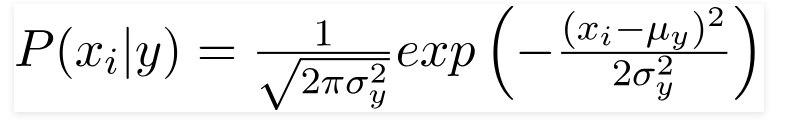

In [20]:
import math

In [37]:
p_yes61=(1/math.sqrt(2*math.pi*var_y))*math.exp(-0.5*((61-mean_y)**2)/var_y)

In [38]:
p_yes61

0.015866793996967672

In [39]:
p_no61=(1/math.sqrt(2*math.pi*var_n))*math.exp(-0.5*((61-mean_n)**2)/var_n)

In [40]:
p_no61

0.0008631916482906215

In [41]:
probability_yes=p_yes61/(p_yes61+p_no61)
probability_yes

0.9484045194901125

In [42]:
probability_no=p_no61/(p_yes61+p_no61)
probability_no

0.05159548050988747

In [43]:
total_probability=probability_yes+probability_no
total_probability

1.0